<a href="https://colab.research.google.com/github/Niyashaji8/Project/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and dataset required


In [4]:
import numpy as np
from sklearn.datasets import load_digits  #load datset

In [5]:
dataset = load_digits()

In [8]:
print(dataset.data)
print(dataset.target)

print("Data shape: ",dataset.data.shape)
print("Images shape: ",dataset.images.shape)

dataimageLength = len(dataset.images)
print("dataimageLength: ",dataimageLength)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
Data shape:  (1797, 64)
Images shape:  (1797, 8, 8)
dataimageLength:  1797


Visualize the Dataset


<Figure size 432x288 with 0 Axes>

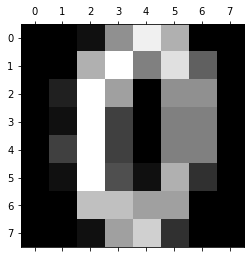

array([[ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.],
       [ 0.,  0., 11., 16.,  8., 14.,  6.,  0.],
       [ 0.,  2., 16., 10.,  0.,  9.,  9.,  0.],
       [ 0.,  1., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  4., 16.,  4.,  0.,  8.,  8.,  0.],
       [ 0.,  1., 16.,  5.,  1., 11.,  3.,  0.],
       [ 0.,  0., 12., 12., 10., 10.,  0.,  0.],
       [ 0.,  0.,  1., 10., 13.,  3.,  0.,  0.]])

In [10]:
n = 10  #no of sample out of sample total 1797

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(dataset.images[n])
plt.show()

dataset.images[n]

Segregate dataset into X(input/independent varisble) and Y(output/dependent variable)
Input - Pixel | Output - Class

In [12]:
X = dataset.images.reshape((dataimageLength,-1))
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
Y = dataset.target
Y

array([0, 1, 2, ..., 8, 9, 8])

Splitting dataset into Train and Test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1347, 64)
(450, 64)


Training

In [17]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,Y_train)

SVC()

Predicting what the digit is from the test data

[4]




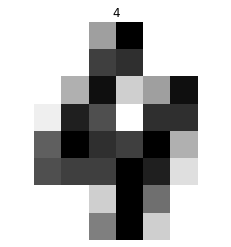

In [20]:
n = 1011  #some random sample value taken
result = model.predict(dataset.images[n].reshape((1,-1)))
plt.imshow(dataset.images[n],cmap = plt.cm.gray_r, interpolation = 'nearest')
print(result)
print("\n")
plt.axis('off')
plt.title('%i' %result)
plt.show()

Prediction for test data

In [21]:
Y_pred = model.predict(X_test)
  

Evaluate model-Accuracy Score

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {0}%".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of the model: 99.11111111111111%


Trying different methods

In [34]:
from sklearn import svm
model1 = svm.SVC(kernel='linear')
model3 = svm.SVC(gamma=0.001)
model4 = svm.SVC(gamma=0.001,C=0.1)

model1.fit(X_train,Y_train)
model3.fit(X_train, Y_train)
model4.fit(X_train, Y_train)



SVC(C=0.1, gamma=0.001)

In [35]:
Y_predModel1 = model1.predict(X_test)
Y_predModel3 = model3.predict(X_test)
Y_predModel4 = model4.predict(X_test)


print("Accuracy of the model 1: {0}%".format(accuracy_score(Y_test,Y_predModel1)*100))
print("Accuracy of the model 3: {0}%".format(accuracy_score(Y_test,Y_predModel3)*100))
print("Accuracy of the model 4: {0}%".format(accuracy_score(Y_test,Y_predModel4)*100))

Accuracy of the model 1: 97.11111111111111%
Accuracy of the model 3: 99.55555555555556%
Accuracy of the model 4: 96.66666666666667%
